In [4]:
import pandas as pd
import numpy as mp
import seaborn as sns
import matplotlib.pyplot as plt


In [5]:
df=pd.read_csv("Admission_Report.csv")

In [6]:
df.head()


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


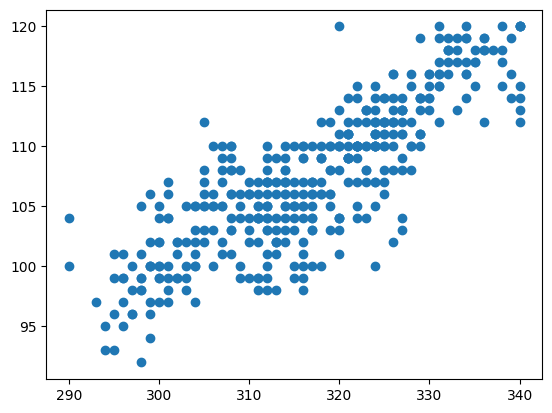

In [7]:
plt.scatter(x=df["GRE Score"],y=df["TOEFL Score"])

In [8]:
df.tail()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67
399,400,333,117,4,5.0,4.0,9.66,1,0.95


<Axes: xlabel='GRE Score', ylabel='TOEFL Score'>

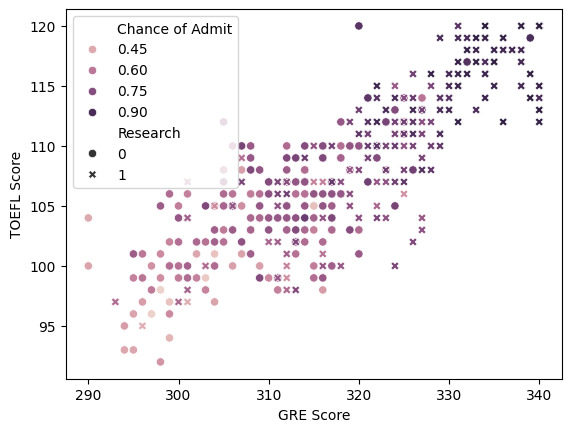

In [9]:
sns.scatterplot(x=df["GRE Score"],y=df["TOEFL Score"],hue=df["Chance of Admit"],style=df["Research"])

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import classification_report,ConfusionMatrixDisplay

In [11]:
df['Chance of Admit']=[1 if each<0.75 else 0 for each in df['Chance of Admit']]

In [12]:
X_train,X_test,y_train,y_test=train_test_split(df.drop("Chance of Admit",axis=1),df["Chance of Admit"],test_size=0.25,random_state=42)

In [13]:
lr=LogisticRegression()
dt=DecisionTreeRegressor()

In [14]:
lr.fit(X_train,y_train)
dt.fit(X_train,y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


DecisionTreeRegressor()

In [16]:
lr.fit(X_train,y_train)
dt.fit(X_train,y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


DecisionTreeRegressor()

In [18]:
y_pred_lr=lr.predict(X_test)
y_pred=dt.predict(X_test)

In [20]:
print("Classificaation report for Logistic regression\n",classification_report(y_test,y_pred_lr))

Classificaation report for Logistic regression
               precision    recall  f1-score   support

           0       0.84      0.93      0.88        41
           1       0.95      0.88      0.91        59

    accuracy                           0.90       100
   macro avg       0.89      0.90      0.90       100
weighted avg       0.90      0.90      0.90       100



In [22]:
print("Classificaation report for Decision tree\n",classification_report(y_test,y_pred))


Classificaation report for Decision tree
               precision    recall  f1-score   support

           0       0.84      0.93      0.88        41
           1       0.95      0.88      0.91        59

    accuracy                           0.90       100
   macro avg       0.89      0.90      0.90       100
weighted avg       0.90      0.90      0.90       100



Confusion Matrix for Logistic Regression


[]

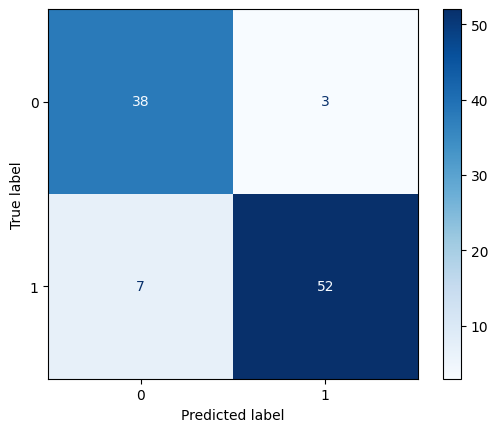

In [23]:
print("Confusion Matrix for Logistic Regression")
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_lr,cmap="Blues")
plt.plot()
